In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [2]:
df = pd.read_csv('../../data/ETH-USD.csv')
df1=df.reset_index()['Close']

In [3]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

## 5-3-2

In [4]:
train_size = int(0.5 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size + test_size]
val_data = df1[train_size + test_size:]

In [5]:
import numpy
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [6]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)

In [8]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", ytest.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", yval.shape)

X_train shape: (964, 100, 1)
y_train shape: (964,)
X_test shape: (538, 100, 1)
y_test shape: (538,)
X_val shape: (326, 100, 1)
y_val shape: (326,)


In [9]:
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [10]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
16/16 [==============================] - 1s 17ms/step - loss: 0.0014 - val_loss: 0.2849
Epoch 2/100
16/16 [==============================] - 0s 8ms/step - loss: 4.0624e-04 - val_loss: 0.2170
Epoch 3/100
16/16 [==============================] - 0s 8ms/step - loss: 2.1085e-04 - val_loss: 0.1497
Epoch 4/100
16/16 [==============================] - 0s 8ms/step - loss: 1.2836e-04 - val_loss: 0.1118
Epoch 5/100
16/16 [==============================] - 0s 9ms/step - loss: 1.1446e-04 - val_loss: 0.0977
Epoch 6/100
16/16 [==============================] - 0s 8ms/step - loss: 9.9426e-05 - val_loss: 0.0827
Epoch 7/100
16/16 [==============================] - 0s 8ms/step - loss: 7.9179e-05 - val_loss: 0.0724
Epoch 8/100
16/16 [==============================] - 0s 8ms/step - loss: 7.0745e-05 - val_loss: 0.0631
Epoch 9/100
16/16 [==============================] - 0s 9ms/step - loss: 6.5543e-05 - val_loss: 0.0544
Epoch 10/100
16/16 [==============================] - 0s 9ms/step - loss: 5.

Epoch 80/100
16/16 [==============================] - 0s 8ms/step - loss: 1.3480e-05 - val_loss: 0.0040
Epoch 81/100
16/16 [==============================] - 0s 8ms/step - loss: 1.3998e-05 - val_loss: 0.0050
Epoch 82/100
16/16 [==============================] - 0s 8ms/step - loss: 1.3561e-05 - val_loss: 0.0042
Epoch 83/100
16/16 [==============================] - 0s 8ms/step - loss: 1.3789e-05 - val_loss: 0.0050
Epoch 84/100
16/16 [==============================] - 0s 8ms/step - loss: 1.3325e-05 - val_loss: 0.0037
Epoch 85/100
16/16 [==============================] - 0s 8ms/step - loss: 1.5046e-05 - val_loss: 0.0046
Epoch 86/100
16/16 [==============================] - 0s 8ms/step - loss: 1.2626e-05 - val_loss: 0.0038
Epoch 87/100
16/16 [==============================] - 0s 8ms/step - loss: 1.2774e-05 - val_loss: 0.0040
Epoch 88/100
16/16 [==============================] - 0s 8ms/step - loss: 1.2745e-05 - val_loss: 0.0037
Epoch 89/100
16/16 [==============================] - 0s 8ms/ste

In [11]:
train_predict = model.predict(X_train)
y_pred = model.predict(X_test)
y_pred_val = model.predict(X_val)

11/11 [==============================] - 0s 2ms/step


In [12]:
train_predict = scaler.inverse_transform(train_predict)
y_pred = scaler.inverse_transform(y_pred)
y_pred_val = scaler.inverse_transform(y_pred_val)

In [13]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1))
yval = scaler.inverse_transform(yval.reshape(-1,1))

In [14]:
print('---------VALIDATE----------')
valid_mape = np.mean(np.abs( (yval - y_pred_val) / yval )) * 100
print('MAPE:', valid_mape)
valid_mae = np.mean(np.abs(y_pred_val - yval))
print('MAE:', valid_mae)
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
print('RMSE:', valid_rmse)
print('---------TEST-------------')
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
print('MAPE:', test_mape)
test_mae = np.mean(np.abs(y_pred - ytest))
print('MAE:', test_mae)
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('RMSE:', test_rmse)

---------VALIDATE----------
MAPE: 4.990685161991812
MAE: 85.16480617920821
RMSE: 95.1762567465478
---------TEST-------------
MAPE: 8.288901972348125
MAE: 247.33918189735573
RMSE: 311.72649125387915


In [15]:
val_data.shape

(427, 1)

In [17]:
x_input=val_data[326:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.37510924 0.37815887 0.37566241 0.37870563 0.38004325 0.37593455
 0.37477514 0.37808108 0.371164   0.37032783 0.36875763 0.37029641
 0.36870457 0.3685939  0.37470005 0.37438071 0.37363106 0.37286346
 0.3732369  0.37120428 0.3722419  0.36859261 0.36409289 0.33855752
 0.33348359 0.33528716 0.3385403  0.33482122 0.32776157 0.33736054
 0.33327198 0.33178935 0.33038736 0.33275767 0.33168832 0.34803179
 0.34282564 0.33024615 0.32661909 0.32842421 0.32823221 0.32686531
 0.3277059  0.32741462 0.33066054 0.32823647 0.32803014 0.32415232
 0.31036336 0.31899146 0.32228245 0.32629825 0.32940035 0.32804269
 0.32543577 0.32849224 0.32980314 0.32543448 0.31727343 0.31916889
 0.31929357 0.31654294 0.31812285 0.31920039 0.3200621  0.33177827
 0.33496395 0.33564461 0.34889577 0.33405098 0.33258266 0.33071127
 0.3230202  0.33028685 0.32789242 0.32768881 0.31632154 0.31376354
 0.3134551  0.30781982 0.31045892 0.31112886 0.31172385 0.32070576
 0.31328267 0.31292528 0.3137094  0.32157987 0.326

13 day output [[0.23192956]]
14 day input [0.37470005 0.37438071 0.37363106 0.37286346 0.3732369  0.37120428
 0.3722419  0.36859261 0.36409289 0.33855752 0.33348359 0.33528716
 0.3385403  0.33482122 0.32776157 0.33736054 0.33327198 0.33178935
 0.33038736 0.33275767 0.33168832 0.34803179 0.34282564 0.33024615
 0.32661909 0.32842421 0.32823221 0.32686531 0.3277059  0.32741462
 0.33066054 0.32823647 0.32803014 0.32415232 0.31036336 0.31899146
 0.32228245 0.32629825 0.32940035 0.32804269 0.32543577 0.32849224
 0.32980314 0.32543448 0.31727343 0.31916889 0.31929357 0.31654294
 0.31812285 0.31920039 0.3200621  0.33177827 0.33496395 0.33564461
 0.34889577 0.33405098 0.33258266 0.33071127 0.3230202  0.33028685
 0.32789242 0.32768881 0.31632154 0.31376354 0.3134551  0.30781982
 0.31045892 0.31112886 0.31172385 0.32070576 0.31328267 0.31292528
 0.3137094  0.32157987 0.3267911  0.33400918 0.3555738  0.3596042
 0.3602303  0.36375029 0.35867517 0.35795028 0.36195382 0.36502981
 0.36637725 0.3728561

27 day output [[0.11681291]]
28 day input [0.32776157 0.33736054 0.33327198 0.33178935 0.33038736 0.33275767
 0.33168832 0.34803179 0.34282564 0.33024615 0.32661909 0.32842421
 0.32823221 0.32686531 0.3277059  0.32741462 0.33066054 0.32823647
 0.32803014 0.32415232 0.31036336 0.31899146 0.32228245 0.32629825
 0.32940035 0.32804269 0.32543577 0.32849224 0.32980314 0.32543448
 0.31727343 0.31916889 0.31929357 0.31654294 0.31812285 0.31920039
 0.3200621  0.33177827 0.33496395 0.33564461 0.34889577 0.33405098
 0.33258266 0.33071127 0.3230202  0.33028685 0.32789242 0.32768881
 0.31632154 0.31376354 0.3134551  0.30781982 0.31045892 0.31112886
 0.31172385 0.32070576 0.31328267 0.31292528 0.3137094  0.32157987
 0.3267911  0.33400918 0.3555738  0.3596042  0.3602303  0.36375029
 0.35867517 0.35795028 0.36195382 0.36502981 0.36637725 0.37285613
 0.35116228 0.34523734 0.33358499 0.3276625  0.31991506 0.31172198
 0.29827222 0.2894454  0.2804381  0.26873168 0.26025295 0.24938351
 0.24051341 0.231929

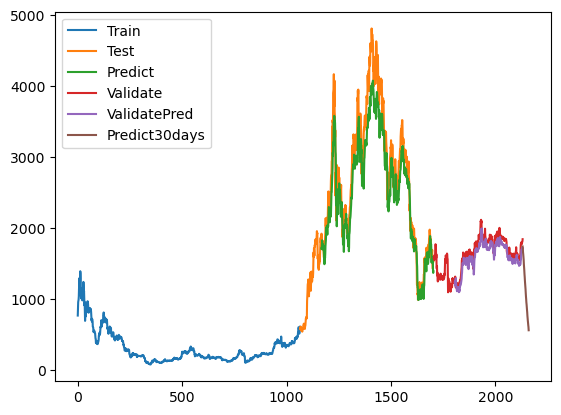

In [18]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))

val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))

plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()